In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

print("Matches shape:", matches.shape)
print("Deliveries shape:", deliveries.shape)
print("\nColumns in matches dataset:", matches.columns)
matches.head()


Matches shape: (1095, 20)
Deliveries shape: (260920, 17)

Columns in matches dataset: Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [ ]:

print(matches.isnull().sum())
matches['winner'].fillna('No Result', inplace=True)
matches.dropna(inplace=True)


id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64


C:\Users\91941\AppData\Local\Temp\ipykernel_20948\1902707701.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches['winner'].fillna('No Result', inplace=True)


In [ ]:

print("Total Seasons:", matches['season'].nunique())
print("Total Teams:", matches['team1'].nunique())
print("Total Matches Played:", matches.shape[0])


Total Seasons: 9
Total Teams: 11
Total Matches Played: 21


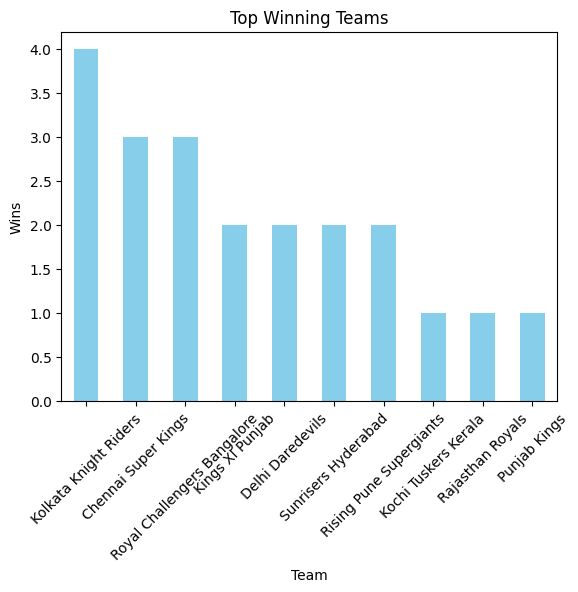

In [ ]:

top_winners = matches['winner'].value_counts().head(10)
top_winners.plot(kind='bar', color='skyblue', title='Top Winning Teams')
plt.xlabel('Team')
plt.ylabel('Wins')
plt.xticks(rotation=45)
plt.show()


C:\Users\91941\AppData\Local\Temp\ipykernel_20948\1776176073.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mom.values, y=mom.index, palette='cool')


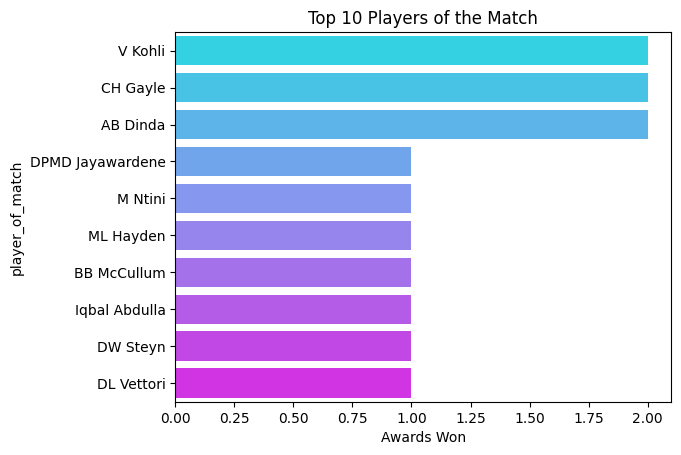

In [ ]:

mom = matches['player_of_match'].value_counts().head(10)
sns.barplot(x=mom.values, y=mom.index, palette='cool')
plt.title("Top 10 Players of the Match")
plt.xlabel("Awards Won")
plt.show()


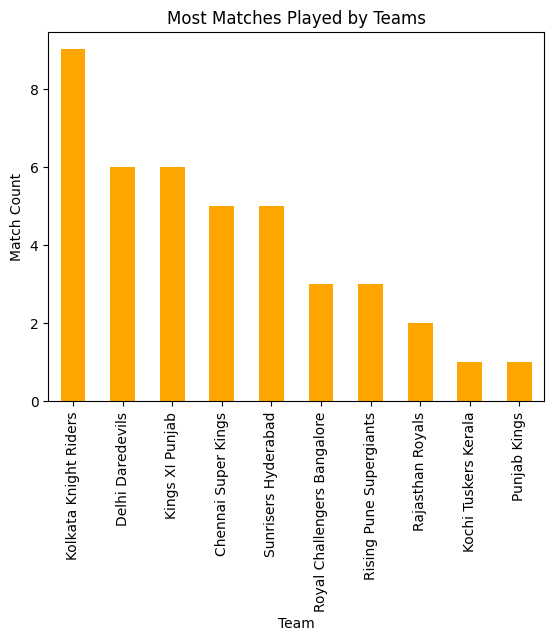

In [ ]:

teams = pd.concat([matches['team1'], matches['team2']])
teams.value_counts().head(10).plot(kind='bar', color='orange', title='Most Matches Played by Teams')
plt.xlabel("Team")
plt.ylabel("Match Count")
plt.show()


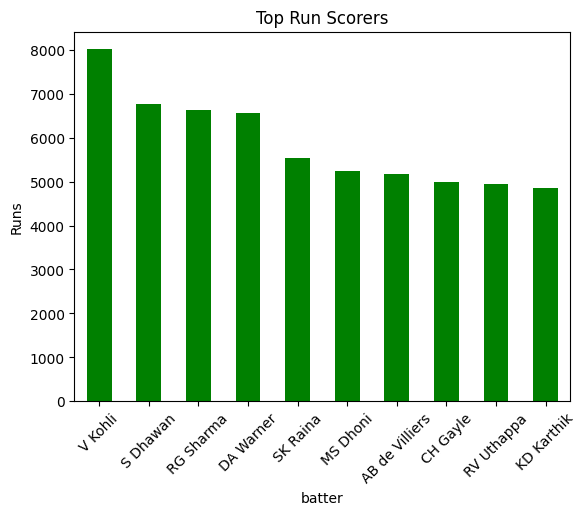

In [ ]:

runs = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)
runs.plot(kind='bar', color='green', title='Top Run Scorers')
plt.ylabel("Runs")
plt.xticks(rotation=45)
plt.show()


C:\Users\91941\AppData\Local\Temp\ipykernel_20948\3661411561.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sixers.values, y=top_sixers.index, palette='Reds_r')


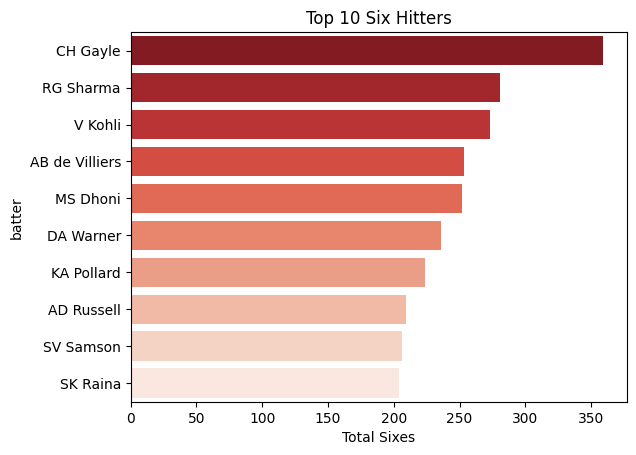

In [ ]:

sixes = deliveries[deliveries['batsman_runs'] == 6]
top_sixers = sixes['batter'].value_counts().head(10)
sns.barplot(x=top_sixers.values, y=top_sixers.index, palette='Reds_r')
plt.title("Top 10 Six Hitters")
plt.xlabel("Total Sixes")
plt.show()


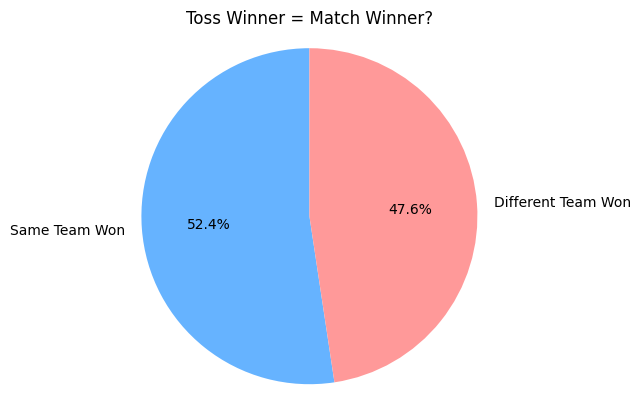

In [ ]:

matches['toss_match_same'] = matches['toss_winner'] == matches['winner']
same = matches['toss_match_same'].value_counts()
labels = ['Same Team Won', 'Different Team Won']
plt.pie(same, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title("Toss Winner = Match Winner?")
plt.axis('equal')
plt.show()


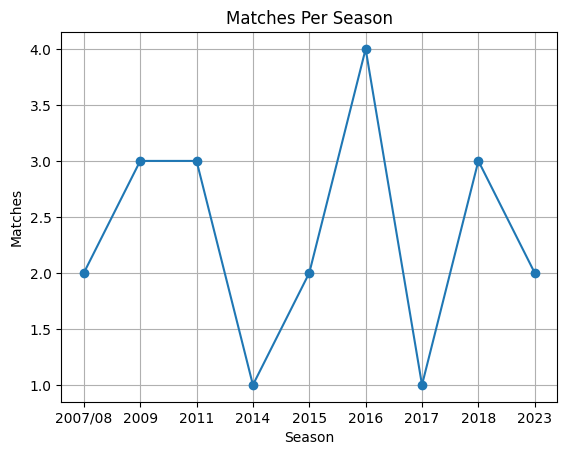

In [ ]:

matches_per_season = matches['season'].value_counts().sort_index()
matches_per_season.plot(marker='o', linestyle='-', title='Matches Per Season')
plt.xlabel("Season")
plt.ylabel("Matches")
plt.grid(True)
plt.show()


C:\Users\91941\AppData\Local\Temp\ipykernel_20948\1491627117.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=venue_counts.index, x=venue_counts.values, palette='Blues_d')


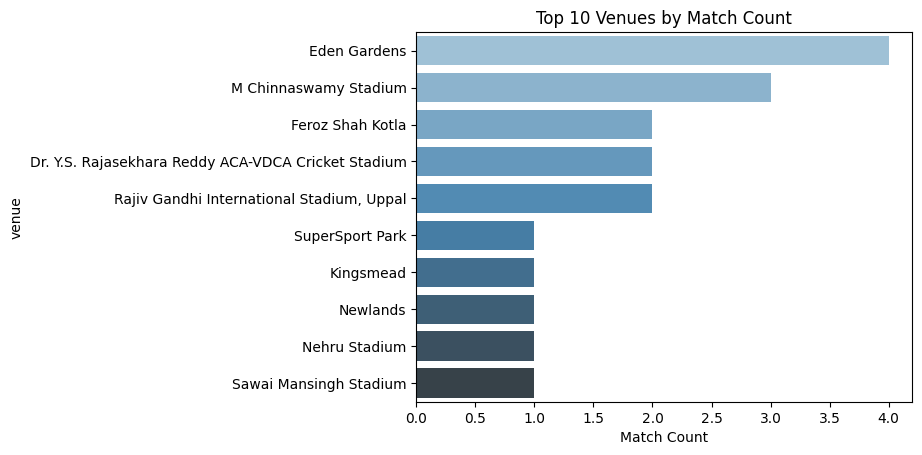

In [ ]:

venue_counts = matches['venue'].value_counts().head(10)
sns.barplot(y=venue_counts.index, x=venue_counts.values, palette='Blues_d')
plt.title("Top 10 Venues by Match Count")
plt.xlabel("Match Count")
plt.show()


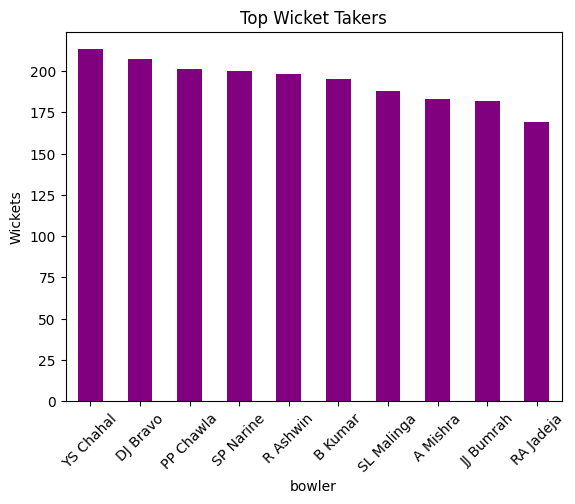

In [ ]:

wickets = deliveries[deliveries['dismissal_kind'].notnull()]
wicket_takers = wickets['bowler'].value_counts().head(10)
wicket_takers.plot(kind='bar', color='purple', title='Top Wicket Takers')
plt.ylabel("Wickets")
plt.xticks(rotation=45)
plt.show()
